Data was acquired from http://simbad.u-strasbg.fr/simbad/ on Oct 27,2021.

In [467]:
galaxy_list = ['NGC 300', 'NGC 1300', 'NGC 1357', 'NGC 1365', 'NGC 1376', 'NGC 1832', 'NGC 2903', 'NGC 3344']
asize_list = [20.89,6.17,1.73,10.72,0.977,1.567,11.480,6.760]
rshift_list = [7.46,9.90,11.8,8.79,11.96,11.07,8.68,9.71]
df = pd.DataFrame({'Galaxy':galaxy_list,'Apparent_Size[arcmin]':asize_list,'Redshift':rshift_list})
df

<IPython.core.display.Javascript object>

,Galaxy,Apparent_Size[arcmin],Redshift
0,NGC 300,20.890,7.46
1,NGC 1300,6.170,9.90
2,NGC 1357,1.730,11.80
3,NGC 1365,10.720,8.79
4,NGC 1376,0.977,11.96
5,NGC 1832,1.567,11.07
6,NGC 2903,11.480,8.68
7,NGC 3344,6.760,9.71


In [468]:
def distance_to_galaxy(arcmins):
    """
    Returns distance to galaxy in million light-years and distance to galaxy in Mega parsecs.
    """
    
    d_Mlyr = 70000/(float(arcmins)/60) * 360/(2*np.pi) /1000000
    d_Mpc = d_Mlyr * 1000000/3.261563776e6
    
    return d_Mlyr, d_Mpc

In [469]:
# Initialize the distance lists
d_Mlyr_list, d_Mpc_list = [],[]

# Loop through the apparent sizes
for asize in df['Apparent_Size[arcmin]']:
    # Get a handle for the distance values
    vals = distance_to_galaxy(asize)
    
    # Store the distance values in their respective lists
    d_Mlyr_list.append(float(vals[0]))
    d_Mpc_list.append(float(vals[1]))

# Construct the distance features for the dataframe
df['d_Mlyr'] = d_Mlyr_list
df['d_Mpc'] = d_Mpc_list

In [470]:
df

,Galaxy,Apparent_Size[arcmin],Redshift,d_Mlyr,d_Mpc
0,NGC 300,20.890,7.46,11.519496,3.531894
1,NGC 1300,6.170,9.90,39.001989,11.958064
2,NGC 1357,1.730,11.80,139.099580,42.648125
3,NGC 1365,10.720,8.79,22.447973,6.882580
4,NGC 1376,0.977,11.96,246.307343,75.518175
5,NGC 1832,1.567,11.07,153.568777,47.084401
6,NGC 2903,11.480,8.68,20.961871,6.426939
7,NGC 3344,6.760,9.71,35.597970,10.914387


In [471]:
def v_galaxy(redshift):
    """
    Returns apparent recession velocity of galaxy in kilometers per second.
    """
    
    return float(redshift)*299792*10**(-3)

In [472]:
# Initialize the velocity list
velocities = []

# Loop through the redshift data
for rshift in df['Redshift']:
    
    # Store the velocity data of each galaxy in the velocity list
    velocities.append(v_galaxy(rshift))

# Construct the velocity feature for the dataframe
df['velocity[km/s]'] = velocities

In [473]:
df

,Galaxy,Apparent_Size[arcmin],Redshift,d_Mlyr,d_Mpc,velocity[km/s]
0,NGC 300,20.890,7.46,11.519496,3.531894,2236.44832
1,NGC 1300,6.170,9.90,39.001989,11.958064,2967.94080
2,NGC 1357,1.730,11.80,139.099580,42.648125,3537.54560
3,NGC 1365,10.720,8.79,22.447973,6.882580,2635.17168
4,NGC 1376,0.977,11.96,246.307343,75.518175,3585.51232
5,NGC 1832,1.567,11.07,153.568777,47.084401,3318.69744
6,NGC 2903,11.480,8.68,20.961871,6.426939,2602.19456
7,NGC 3344,6.760,9.71,35.597970,10.914387,2910.98032


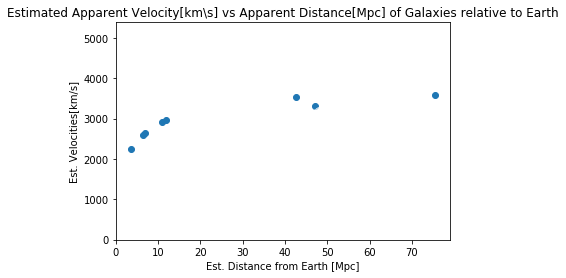

In [500]:
# Plot of datapoints
plt.scatter(df['d_Mpc'],df['velocity[km/s]']);

# Plot the metadata for the graph
plt.title('Estimated Apparent Velocity[km\s] vs Apparent Distance[Mpc] of Galaxies relative to Earth');
plt.xlabel('Est. Distance from Earth [Mpc]');
plt.ylabel('Est. Velocities[km/s]');

In [363]:
# Necessary Imports
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [475]:
def lr(X,y):
    """
    Numpy Mean Square Error Method for Univariate Linear Regression.
    
    Returns, in order:
        theta_0, theta_1, y_predictions
    """
    
    # Get the array of parameter values as b from the theory previously demonstrated
    theta = inv( X.T @ X ) @ X.T @ y
    
    return theta, X @ theta

In [476]:
# Define the design matrix having a single column such that it is a column vector
# NOTE: without reshaping this vector to a column vector, it will fail to compute the linear algebra operations necessary for our theta solution
X = np.array(df['d_Mlyr'].values).reshape(-1,1)

y = df['velocity[km/s]'].values

In [477]:
# Hubble Constant from this approximation is the second number in the array
lr(X,y)

(array([20.87868594]),
 array([ 240.51194165,  814.31028543, 2904.21645149,  468.6841848 ,
        5142.57365515, 3206.31426999,  437.65631194,  743.2388256 ]))

In [478]:
# Construct the conversion factor
conv_factor = 3261563.7769443/1000000 #1Mpc = [?]Mlyr

# Determine the Hubble constant in Mlyr
HO_mlyr = lr(X,y)[0]
# HO_mlyr = 22

#HO must be given in km/s/Mpc not km/s/mlyr
HO_mpc = float(HO_mlyr)*conv_factor
HO_mpc

68.0971657624307

In [489]:
np.array([70,74,72,67.4,74,69.8]).mean() #avgHO[km/s/Mpc]

71.2

In [490]:
print(f'{round(np.abs(HO_mpc-71.2)/HO_mpc*100,1)}% error')

4.6% error


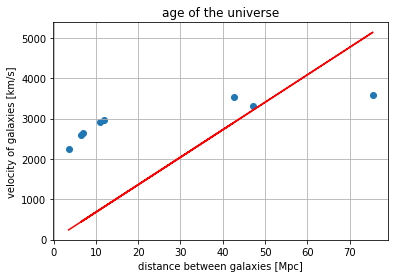

In [480]:
# Plot the datapoints
plt.scatter(df['d_Mpc'],df['velocity[km/s]'])

# Plot of regression line
plt.plot(df['d_Mpc'],df['d_Mpc']*HO_mpc,c='red');

# Plot metadata for the graph
plt.title('age of the universe');
plt.xlabel('distance between galaxies [Mpc]');
plt.ylabel('velocity of galaxies [km/s]');
plt.grid();

In [491]:
age_of_universe = 977.86/HO_mpc
print(age_of_universe,'[billions of years]')

14.359775315927857 [billions of years]


In [492]:
print(f'{round(np.abs(age_of_universe-13.787)/13.8*100,1)}% error')

4.2% error
